In [1]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

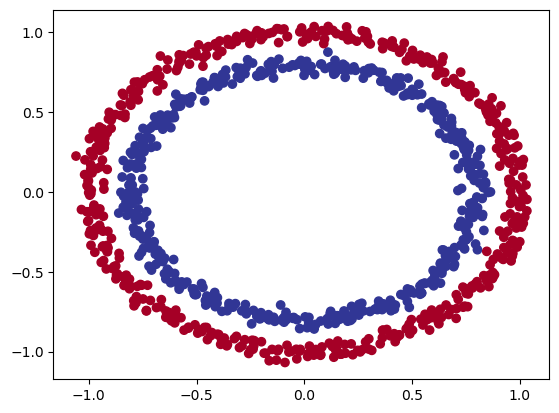

In [2]:
samples = 1000
x,y = make_circles(samples, noise=0.03, random_state=42)
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)


In [3]:
#convert data to tensor and train test split
from sklearn.model_selection import train_test_split
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=42)



In [4]:
#create a model(non linear) with non linear activation function 
class circlemodel(nn.Module):
    def __init__(self):
        super(circlemodel, self).__init__()
        self.layer1 = nn.Linear(2, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()#relu is a non linear activation function
        
    def forward(self, x):
       return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
model = circlemodel() 
model

circlemodel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [5]:
#set loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [6]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#train and test with non linearity model

epochs =1000

for epoch in range(epochs):
    model.train()
    y_logits = model(xtrain).squeeze()   # Raw logits
    y_pred = torch.round(torch.sigmoid(y_logits))  # Apply sigmoid here for predictions
    train_loss = loss_fn(y_logits, ytrain)   
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        test_logits = model(xtest).squeeze()  # Raw logits
        test_pred = torch.round(torch.sigmoid(test_logits))  # Apply sigmoid here
        test_loss = loss_fn(test_logits, ytest)  # Add .unsqueeze(1)             # Still raw logits

    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | accuracy: {torch.round(torch.mean((test_pred == ytest).type(torch.float)) * 100):.2f}%") 

Epoch: 0 | Train Loss: 0.6991 | Test Loss: 0.6968 | accuracy: 50.00%
Epoch: 100 | Train Loss: 0.6913 | Test Loss: 0.6894 | accuracy: 49.00%
Epoch: 200 | Train Loss: 0.6904 | Test Loss: 0.6886 | accuracy: 50.00%
Epoch: 300 | Train Loss: 0.6892 | Test Loss: 0.6875 | accuracy: 50.00%
Epoch: 400 | Train Loss: 0.6872 | Test Loss: 0.6858 | accuracy: 51.00%
Epoch: 500 | Train Loss: 0.6835 | Test Loss: 0.6829 | accuracy: 54.00%
Epoch: 600 | Train Loss: 0.6766 | Test Loss: 0.6768 | accuracy: 57.00%
Epoch: 700 | Train Loss: 0.6659 | Test Loss: 0.6676 | accuracy: 70.00%
Epoch: 800 | Train Loss: 0.6471 | Test Loss: 0.6512 | accuracy: 78.00%
Epoch: 900 | Train Loss: 0.6135 | Test Loss: 0.6223 | accuracy: 86.00%


In [7]:
#make predictions and evaluate the model
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    response = requests.get(url)
    with open("helper_functions.py", "wb") as file:
        file.write(response.content)
from helper_functions import plot_decision_boundary, plot_predictions


helper_functions.py already exists, skipping download.


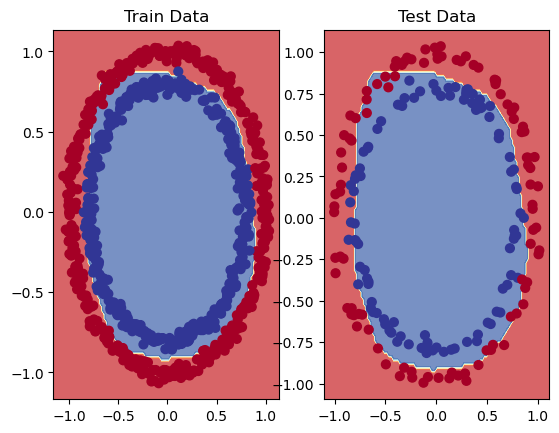

In [8]:
plt.subplot(1, 2, 1)
plt.title("Train Data")
plot_decision_boundary(model, xtrain, ytrain)
plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model, xtest, ytest)

In [9]:
from sklearn.model_selection import train_test_split  # Importing train_test_split

#create toy multiclass dataset
from sklearn.datasets import make_blobs

#hyperparameters
NUM_CLASSES = 4
NUM_FEATURES=2
RANDOM_SEED = 42

x,y = make_blobs(n_samples=1000, centers=NUM_CLASSES, n_features=NUM_FEATURES, random_state=RANDOM_SEED) 

#turn datas into tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y, test_size=0.2, random_state=RANDOM_SEED)


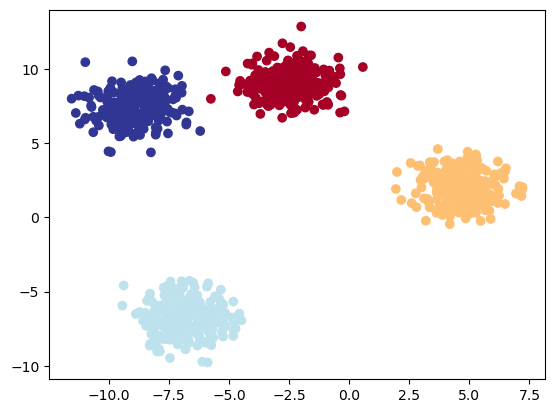

In [10]:
#plot data
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [12]:
#building a mulit-class classification model
class mcmodel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=8):
        super().__init__()
        self.stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units,output_features) # Output layer for multiple classes
            
        )
    def forward(self, x):
        return self.stack(x) 
model1 = mcmodel(input_features=2, output_features=4, hidden_units=8)
model1

mcmodel(
  (stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [13]:
#loss and optimizer setup
lossfn = nn.CrossEntropyLoss()  # CrossEntropyLoss for multi-class classification
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1)

In [14]:
y_logits1 = model1(xtrain1)#logistic to pred
y_pred1 = torch.softmax(y_logits1, dim=1)
print(y_logits1)# Get predicted class indices
print(y_pred1)

tensor([[-0.7097, -0.6568, -1.4328, -1.0505],
        [-0.2312, -1.2148, -0.9651, -0.2835],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        ...,
        [-0.2409, -1.2337, -0.9933, -0.2956],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.0720, -0.8900, -0.5313, -0.1141]], grad_fn=<AddmmBackward0>)
tensor([[0.3076, 0.3243, 0.1493, 0.2188],
        [0.3568, 0.1334, 0.1712, 0.3386],
        [0.3011, 0.1843, 0.2823, 0.2323],
        ...,
        [0.3586, 0.1329, 0.1690, 0.3395],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3298, 0.1456, 0.2084, 0.3162]], grad_fn=<SoftmaxBackward0>)


In [15]:
#pred labels
y_pred_labels1 = torch.argmax(y_pred1, dim=1)
y_pred_labels1

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
#create a training and testing loop for multi-class classification
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model1.train()
    y_logits1 = model1(xtrain1)  # Raw logits
    y_pred1 = torch.softmax(y_logits1, dim=1).argmax(dim=1)  # Apply softmax for predictions
    train_loss1 = lossfn(y_logits1, ytrain1.long())  # Use long for class indices
    optimizer1.zero_grad()
    train_loss1.backward()
    optimizer1.step()
    model1.eval()
    with torch.inference_mode():
        test_logits1 = model1(xtest1)  # Raw logits
        test_pred1 = torch.softmax(test_logits1, dim=1).argmax(dim=1)  # Apply softmax for predictions
        test_loss1 = lossfn(test_logits1, ytest1.long())  # Use long for class indices
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {train_loss1:.4f} | Test Loss: {test_loss1:.4f} | accuracy: {torch.round(torch.mean((test_pred1 == ytest1).type(torch.float)) * 100):.2f}%")

Epoch: 0 | Train Loss: 1.1523 | Test Loss: 1.0680 | accuracy: 44.00%
Epoch: 10 | Train Loss: 0.6225 | Test Loss: 0.6393 | accuracy: 100.00%
Epoch: 20 | Train Loss: 0.3899 | Test Loss: 0.3934 | accuracy: 100.00%
Epoch: 30 | Train Loss: 0.2060 | Test Loss: 0.1986 | accuracy: 100.00%
Epoch: 40 | Train Loss: 0.0724 | Test Loss: 0.0667 | accuracy: 100.00%
Epoch: 50 | Train Loss: 0.0350 | Test Loss: 0.0321 | accuracy: 100.00%
Epoch: 60 | Train Loss: 0.0229 | Test Loss: 0.0206 | accuracy: 100.00%
Epoch: 70 | Train Loss: 0.0171 | Test Loss: 0.0150 | accuracy: 100.00%
Epoch: 80 | Train Loss: 0.0138 | Test Loss: 0.0118 | accuracy: 100.00%
Epoch: 90 | Train Loss: 0.0115 | Test Loss: 0.0096 | accuracy: 100.00%


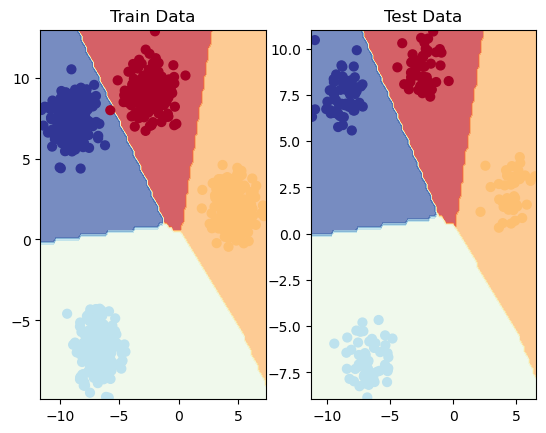

In [17]:
plt.subplot(1, 2, 1)
plt.title("Train Data")
plot_decision_boundary(model1, xtrain1, ytrain1)
plt.subplot(1, 2, 2)
plt.title("Test Data")
plot_decision_boundary(model1, xtest1, ytest1)#poor classification